<a href="https://colab.research.google.com/github/evolvej2/statistics/blob/main/statsmodels_synthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistics with synthetic data

Jacob Johansson 2024

This notebook is intended to serve as a sandbox for exploring and understanding statistical concepts through the use of customizable synthetic data.

##Usage

The data and examples in this notebook have been designed to represent "best-case" scenarios where statistical analysis assumptions are valid, and results are expected to be statistically significant. By providing a collection of standard tests on synthetic data, the notebook offers a controlled environment to explore various aspects of statistical analysis.

###Ideas for experiments

**1. Model predictions**

Synthetic data provides full control over the true effects of explanatory variables, enabling experiments on how predicted effects compare to assumed (true) effects. Specifically, you can study:

- Effect size of the focal variable: How strongly does the true effect influence p-values and confidence intervals?
- Random effects in the data: What is the impact of increased variability or noise?
- Effects of other explanatory variables: How do multicollinearity or interaction terms affect predictions?
- Sample size: Larger samples generally reduce uncertainty but may not always lead to better predictions in overparameterized models.

**2. Validity of statistical tests**

Statistical tests rely on several assumptions to yield valid results. Exploring scenarios where these assumptions are violated helps deepen understanding of their importance. Or, as Leo Tolstoy eloquently put it in Anna Karenina (1877):

"All happy families are alike; each unhappy family is unhappy in its own way."

Ways to experiment with invalidating statistical tests:

- Reducing sample size: Small sample sizes lead to reduced statistical power, increasing the likelihood of Type II errors.
- Reducing the effects of explanatory variables: Smaller effects result in weaker relationships, making it harder to detect significance.
- Generating data from non-normal distributions: Many tests assume normality; deviations can compromise validity.

**3. Comparing statistical approaches**

By applying different statistical methods to the same dataset, you can explore their scope, similarities, and differences. For instance, a single dataset with grouped data can be subjected to different treatments can be analyzed using:
- T-tests: For pairwise group comparisons.
- ANOVA: For assessing variance across groups.
- Linear regression: For modeling group effects as predictors.

Experiments include:

- Comparing result tables to identify consistent or divergent findings across methods.
- Investigating how sample size, effect size, or data distribution affects the conclusions drawn by different approaches.



#Synthetic data of residential energy costs

The synthetic data represents the costs of energy consumption for residential houses. Yearly energy consumption cost, measured in euros, is modeled as a function of several explanatory variables, such as house area, heating system, and other factors relevant to specific examples and analyses below.


#Contents


1. One sample t-test and point estimate
2. Two-sample t-test with mean difference and confidence interval
3. Simple linear regression
4. Multiple linear regression
5. Interactions in multiple linear regression
6. One-way Anova
7. Two-way Anova

In [2]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats
import matplotlib.cm as cmx

##1. One-sample t-test and point estimate

**Data:** We consider a single sample of houses. The response variable `energy_cost` is drawn from a normal distribution (mean = 2000, std = 500).

**t-test**

*Objective* : To establish whether the mean of the sample differs from 0, which in this case represents our null hypothesis. If the p-value < 0.05, we reject the null hypothesis.

*Result* : Under default settings, the test suggests that the mean of `energy_cost` is significantly (p < 0.05) different from zero.

**Point estimate**

*Objective* : To quantify the mean value of the sample and a confidence interval [A, B]. The confidence interval indicates where the mean is situated 95% of the time.

*Result* : Under default settings, the calculation suggests that the `energy_cost` has a mean of close to 2000 and a standard deviation of approximately 500, corresponding well to the true values.


Data
-----------------


,energy_cost
0,2149.014246
1,1958.520710
2,2194.306561
3,2456.908957
4,1929.753988



One sample t-test
-----------------

Results:
TtestResult(statistic=72.26435038783579, pvalue=1.79369002282265e-87, df=99)
p-value below 0.05, hence null hypothesis rejected

Point estimate
-----------------

Results compared to assumptions:
Assumed mean: 2000
Estimated mean: 1968.8460447817715

Assumed SDE: 300
Estimated SDE: 272.4505284023402

Confidence interval:[ 1915.445741214913 , 2022.2463483486301 ]

Confidence interval from built-in function:


(1915.4467224580221, 2022.245367105521)

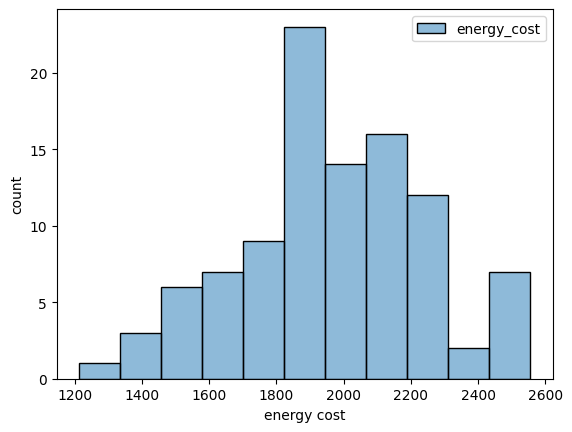

In [12]:
#parameters assumed for the synthetic data
assumed_mean = 2000 #mean
assumed_standard_deviation = 300 #standard deviation

#set sample size
sample_size = 100

#set a random seed for reproducibility of results
np.random.seed(42)  # For reproducibility

#generate synthetic energy cost data
energy_cost=np.random.normal(assumed_mean,assumed_standard_deviation,size=sample_size)

#create a DataFrame to store the energy cost data
df=pd.DataFrame({'energy_cost' : energy_cost})

#display the dataframe
print('\nData')
print('-----------------')
display(df.head())

#visualize
ax = sns.histplot(df)
ax.set_xlabel('energy cost')
ax.set_ylabel('count')
###
# One-sample t-test
###

#null hypothesis: that the estimated mean is different from zero
mean_null_hypothesis = 0

#compute p-value
result=stats.ttest_1samp(a=df['energy_cost'], popmean=mean_null_hypothesis)

#print results
print('\nOne sample t-test')
print('-----------------')
print('\nResults:')
print(result)
print('p-value below 0.05, hence null hypothesis rejected')

###
# Point estimate
###
#calculate the mean
estimated_mean=df['energy_cost'].mean()
estimated_standard_deviation=df['energy_cost'].std()

#calculate standard error of the mean
estimated_standard_error=df['energy_cost'].std()/np.sqrt(df.shape[0])

#calculate Z-score for a 95% confidence interval
z_score=1.96

#compute the lower and upper limits of the confidence interval
low_lim=estimated_mean-z_score*estimated_standard_error
up_lim=estimated_mean +z_score*estimated_standard_error


#print the results of the point estimate
print('\nPoint estimate')
print('-----------------')
print('\nResults compared to assumptions:')
print('Assumed mean:', assumed_mean)
print('Estimated mean:', estimated_mean)
print('')
print('Assumed SDE:', assumed_standard_deviation)
print('Estimated SDE:', estimated_standard_deviation)
print('')
print('Confidence interval:[',low_lim,',',up_lim,']')
print('')
print('Confidence interval from built-in function:')
stats.norm.interval(confidence=0.95, loc=estimated_mean, scale=estimated_standard_error)


###2. Two-sample t-test with mean difference and confidence interval

**Data:** The response variable `energy_cost` is drawn from normal distributions representing houses that are large and consume more energy (mean = 3000, std = 300) vs. small and consume less energy (mean = 2000, std = 200).

**t-test**:

*Objective* : To establish whether the means of the two samples differ from each other, with the null hypothesis that their means do not differ.

*Result* : Under default settings, the test suggests there is a significant (p < 0.05) difference between the two samples.


**Calculation of mean difference and confidence interval**

*Objective* : To quantify the difference in the means of the two samples and their confidence intervals.

*Result* : The difference in mean is about 1000, corresponding well to the true difference.


Data
-----------------


,energy_cost_small_houses,energy_cost_large_houses
0,2248.357077,2555.461295
1,1930.867849,1924.503211
2,2323.844269,2687.849009
3,2761.514928,2199.680655
4,1882.923313,2354.153125



Two sample t-test
-----------------

Results:
TtestResult(statistic=-3.290795622149039, pvalue=0.001878584099331692, df=47.94828233683639)

Calculation of mean difference and confidence interval
-----------------

Results:
Mean difference: -438.03415340195124
95% Confidence Interval for the mean difference: (-705.6675147473493, -170.40079205655314)


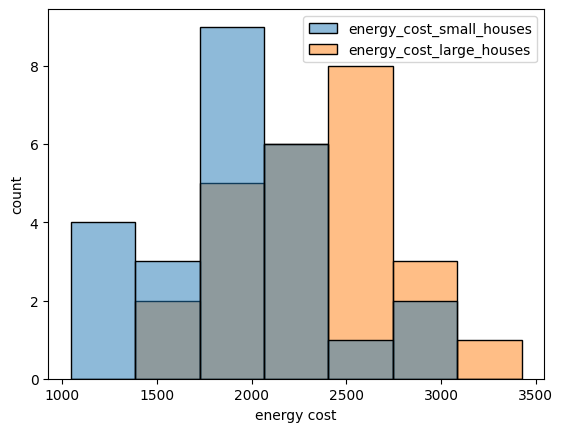

In [13]:
#parameters assumed for the synthetic data
assumed_mean_small_houses = 2000  #mean energy cost for small houses
assumed_std_small_houses = 500    #standard deviation of energy cost for small houses
assumed_mean_large_houses = 2500  #mean energy cost for large houses
assumed_std_large_houses = 500    #standard deviation of energy cost for large houses

#set sample size
sample_size = 25

#set a random seed for reproducibility of results
np.random.seed(42)  # For reproducibility

#generate synthetic energy cost data
energy_cost_small_houses=np.random.normal(assumed_mean_small_houses,assumed_std_small_houses,size=sample_size)
energy_cost_large_houses=np.random.normal(assumed_mean_large_houses,assumed_std_large_houses,size=sample_size)

#null hypothesis: that the estimated mean is different from zero
mean_null_hypothesis = 0

#create a DataFrame to store the energy cost data
df=pd.DataFrame({
    'energy_cost_small_houses' : energy_cost_small_houses,
    'energy_cost_large_houses' : energy_cost_large_houses
})

#display the dataframe
print('\nData')
print('-----------------')
display(df.head())

#visualize the data
ax = sns.histplot(df)
ax.set_xlabel('energy cost')
ax.set_ylabel('count')

###
# Two-sample t-test
###

#compute p-value
result=stats.ttest_ind(a=df['energy_cost_small_houses'], b=df['energy_cost_large_houses'], equal_var=False)

#print results
print('\nTwo sample t-test')
print('-----------------')
print('\nResults:')
print(result)

###
# Mean difference and confidence interval
###

#calculate group means
group_A = df['energy_cost_small_houses']
group_B = df['energy_cost_large_houses']
mean_A = np.mean(group_A)
mean_B = np.mean(group_B)

se_A = np.std(group_A, ddof=1) / np.sqrt(len(group_A))
se_B = np.std(group_B, ddof=1) / np.sqrt(len(group_B))

#calculate the mean difference
mean_diff = mean_A - mean_B

#standard error of the difference
se_diff = np.sqrt(se_A**2 + se_B**2)

# t critical value for 95% confidence (two-tailed)
t_crit = stats.t.ppf(0.975, df=len(group_A) + len(group_B) - 2)

#confidence interval
ci_lower = mean_diff - t_crit * se_diff
ci_upper = mean_diff + t_crit * se_diff

#print the results
print('\nCalculation of mean difference and confidence interval')
print('-----------------')
print('\nResults:')
print("Mean difference:", mean_diff)
print("95% Confidence Interval for the mean difference:", (ci_lower, ci_upper))


###4. Simple linear regression

**Data:** The response variable energy_cost is assumed to increase with house_area (explanatory variable) and that there is a fixed cost of energy and random noise.

*Assumptions*

*   `house_area`: The size of the house, typically measured in square meters, directly impacts energy consumption due to heating requirements
*   `fixed_cost`: Every household consumes a certain minimum amount of energy irrespective of their house size, for example, for cooking.

*Parameters*

`house_area`: normal distribution (mean = 100, std = 30)
<br>`random_effects`: normal distribution (mean = 0, std = 300)
<br>`fixed_cost`: 500
<br>`area_effect`: 20

*Formula to generate data*

`energy_cost = fixed_cost + area_effect * house_area + random_effects`

**Objective of the analysis**:
* To establish whether there is a correlation between energy_cost and house_area.
* To estimate the strength of the relationship.

**Result:** Under default settings, the test suggests there is a significant (p < 0.05) correlation between house_area and energy_cost. The estimated value of the fixed cost (`coef` for `Intercept` in the result table) is 596.99 and relatively close to the true (assumed) value of 500. The relative effect (`coef` for `house_area` in the result table) is 19.0450 and close to the true (assumed) value of 20.


Data
-----------------


,energy_cost,house_area
0,2514.954343,114.901425
1,2332.912355,95.852071
2,2820.070220,119.430656
3,3253.362460,145.690896
4,2327.250833,92.975399



Simple linear regression
-----------------

Results:
                            OLS Regression Results                            
Dep. Variable:            energy_cost   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     739.0
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           1.94e-47
Time:                        21:38:11   Log-Likelihood:                -665.54
No. Observations:                 100   AIC:                             1335.
Df Residuals:                      98   BIC:                             1340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

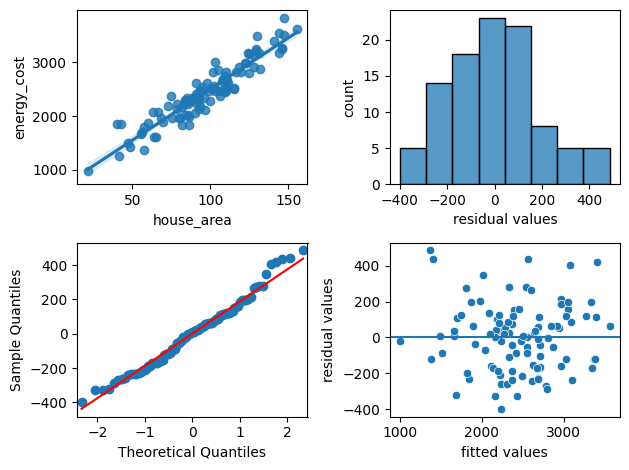

In [14]:
#parameters assumed for the synthetic data
mean_house_area = 100       #assumed mean house area (m2)
std_house_area = 30         #assumed standard deviation of house area
area_factor = 20            #assumed effect of area on energy cost (euro/m2)
fixed_cost = 500            #assumed fixed cost for any household
std_random_effects = 200    #assumed standard deviation of random effects (noise)


#set sample size
sample_size = 100

#set a random seed for reproducibility of results
np.random.seed(42)  # For reproducibility

#generate house area data
house_area=np.random.normal(mean_house_area,std_house_area,size=sample_size)

#generate random effects
random_effects = np.random.normal(0,std_random_effects,size=sample_size)

#generate synthetic energy cost data
energy_cost=fixed_cost + area_factor * house_area + random_effects

#create a DataFrame to store the energy cost data
df = pd.DataFrame({
    'energy_cost': energy_cost,
    'house_area': house_area
 })

#display the dataframe
print('\nData')
print('-----------------')
display(df.head())

#conduct linear regression and store
OLS=ols(formula='energy_cost ~ house_area', data=df)
model=OLS.fit()
results=model.summary()

#print the result table
print('\nSimple linear regression')
print('-----------------')
print('\nResults:')

print(results)

#visualize the data and the results
fig,axs = plt.subplots(2,2)
sns.regplot(ax=axs[0,0], data=df, x='house_area', y='energy_cost')
sns.histplot(ax=axs[0,1],data=model.resid)
axs[0,1].set_xlabel('residual values')
axs[0,1].set_ylabel('count')
sm.qqplot(ax=axs[1,0], data=model.resid, line='s')
sns.scatterplot(ax=axs[1,1], x=model.fittedvalues,y=model.resid)
axs[1,1].set_xlabel('fitted values')
axs[1,1].set_ylabel('residual values')
axs[1,1].axhline(0)
plt.tight_layout()
plt.show()

###Multiple linear regression

**Data:** The response variable energy_cost is assumed to increase with house_area, decrease with outdoor_temperature, and depend on whether or not a heat pump is installed. We assume no correlation between energy_cost and humidity. There is also a fixed cost and random noise.

*Assumptions* :
* `house_area`: Larger houses require more energy for heating.
* `outdoor_temperature`: Seasonal or environmental temperature affects energy costs, especially for heating and cooling systems.
* `humidity`: Assumed to have no direct systematic effect on energy_cost and hence uncorrelated.
* `heat_pump`: Air or ground heat pumps reduce energy costs.
* `fixed_cost`: Every household consumes a minimum amount of energy for basic needs.
* Random noise accounts for unmeasured variables.

*Model*:
<br>`house_area`: normal distribution (mean = 100, std = 30)
<br>`outdoor_temperature`: normal distribution (mean = 15, std = 5)
<br>`humidity`: normal distribution (mean = 50, std = 20)
<br>`heatpump_installed`: binary variable (50% probability for each state)
<br>`random_effects`: normal distribution (mean = 0, std = 150)

Coefficients :
<br>`area_effect` = 20,
<br>`heatpump_effect` = -200,
<br>`temperature_effect` = -20,
<br>`fixed_cost` = 500

*Formula to generate data*:

`energy_cost = fixed_cost + area_effect * house_area + temperature_effect * outdoor_temperature + heatpump_effect * heatpump_installed + random_effects`

**Objective of the analysis**:
* To establish whether there is a correlation between energy_cost and any of the explanatory variables.
* To estimate the strength of the relationship between energy_cost and the explanatory factors.

**Result**: Under default settings, the test suggests there is a significant (p < 0.05) correlation between energy_cost and house_area, outdoor_temperature, and heatpump_installed. The p-value for humidity is above 0.05 and hence not significant as expected. The model prediction of the effects of the different factors are shown below:

```
Factor:           Estimated vs True Value
area_effect:          10.19 vs 20
heatpump_effect:     -222.5 vs -200
temperature_effect:  -23.63 vs -20
fixed_cost:           552.7 vs 500
```
The estimated effects are overall relatively similar to the true values, but for example, the effect of house_area (area_effect) is more far off than in the simple linear regression example.


Data
-----------------


,energy_cost,house_area,outdoor_temperature,humidity,heatpump_installed
0,2968.036006,114.901425,7.923146,57.155747,0.0
1,2037.861209,95.852071,12.896773,61.215691,0.0
2,2296.926298,119.430656,13.286427,71.661025,1.0
3,2904.136744,145.690896,10.988614,71.076041,1.0
4,1557.052188,92.975399,14.193571,22.446613,1.0


                            OLS Regression Results                            
Dep. Variable:            energy_cost   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     326.7
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           1.35e-54
Time:                        21:41:23   Log-Likelihood:                -647.42
No. Observations:                 100   AIC:                             1305.
Df Residuals:                      95   BIC:                             1318.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

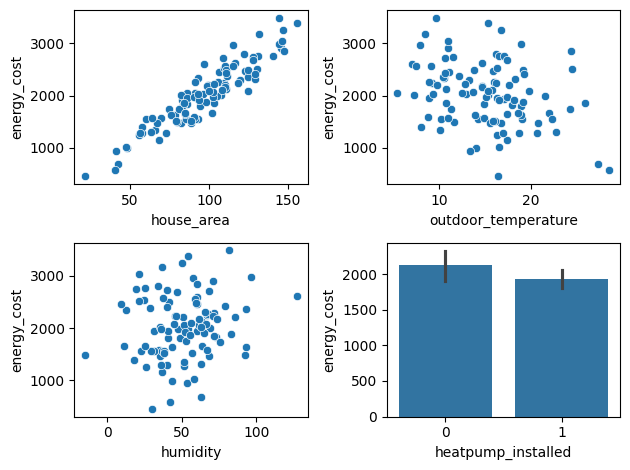

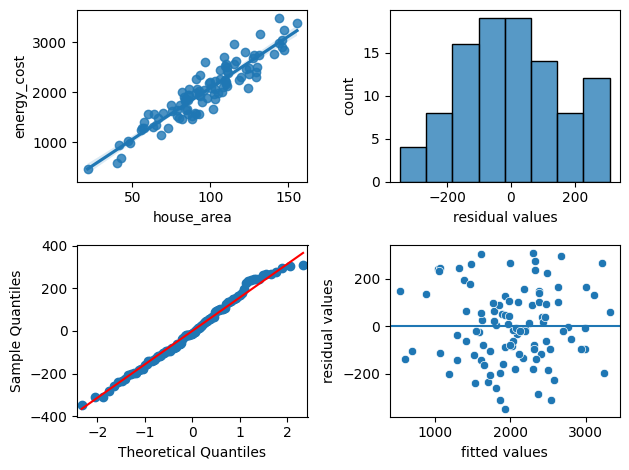

In [17]:
#parameters assumed for the synthetic data

#   mean and standard deviations of explanatory variables
mean_house_area = 100           #assumed mean house area (m2)
std_house_area = 30             #assumed standard deviation of house area
mean_outdoor_temperature = 15   #assumed mean temperature (degree Celsius)
std_outdoor_temperature = 5    #assumed standard deviation of temperature
mean_humidity = 50              #assumed mean humidity (%)
std_humidity = 20               #assumed standard deviation of humidity

#   relative effects of explanatory variables
area_effect = 20            #assumed effect of area on energy cost (euro/m2)
heatpump_effect = -200
temperature_effect = -20

#   assumed fixed energy cost for any house
fixed_costs = 500

#   assumed standard deviation of random effects (noise)
std_random_effects = 150

#set sample size
sample_size = 100

#set a random seed for reproducibility of results
np.random.seed(42)  # For reproducibility

#generate data for explanatory variables and random effects
house_area=np.random.normal(mean_house_area,std_house_area,size=sample_size)
outdoor_temperature=np.random.normal(mean_outdoor_temperature,std_outdoor_temperature,size=sample_size)
humidity=np.random.normal(mean_humidity,std_humidity,size=sample_size)

#1 for installed, 0 otherwise
heatpump_installed = np.round(np.random.rand(sample_size))
random_effects = np.random.normal(0,std_random_effects,size=sample_size)

#generate synthetic energy cost data
energy_cost=fixed_costs + area_effect*house_area + temperature_effect*outdoor_temperature + heatpump_effect * heatpump_installed + random_effects

#create a DataFrame to store the energy cost data
df = pd.DataFrame({
    'energy_cost': energy_cost,
    'house_area': house_area,
    'outdoor_temperature': outdoor_temperature,
    'humidity': humidity ,
    'heatpump_installed': heatpump_installed
 })

#display the dataframe
print('\nData')
print('-----------------')
display(df.head())

#format heatpump as an integer and categorical variable (for the analysis)
df['heatpump_installed']=df['heatpump_installed'].astype('int')
df['heatpump_installed']=df['heatpump_installed'].astype('category')

#visualize the data
fig1, axs1 = plt.subplots(2, 2)
sns.scatterplot(ax = axs1[0,0], data=df, x='house_area', y='energy_cost')
sns.scatterplot(ax = axs1[0,1],data=df, x='outdoor_temperature', y='energy_cost')
sns.scatterplot(ax = axs1[1,0],data=df, x='humidity', y='energy_cost')
sns.barplot(ax = axs1[1,1],data=df, x='heatpump_installed', y='energy_cost')
plt.tight_layout()

#formulate statistical model and perform test
formula='energy_cost ~ house_area + outdoor_temperature + humidity + heatpump_installed'
OLS=ols(formula=formula, data=df)
model=OLS.fit()
results=model.summary()
print(results)

#visualize the results
fig2,axs2=plt.subplots(2,2)
sns.regplot(ax=axs2[0,0], data=df, x='house_area', y='energy_cost')
sns.histplot(ax=axs2[0,1],data=model.resid)
axs2[0,1].set_xlabel('residual values')
axs2[0,1].set_ylabel('count')
sm.qqplot(ax=axs2[1,0], data=model.resid, line='s')
sns.scatterplot(ax=axs2[1,1], x=model.fittedvalues,y=model.resid)
axs2[1,1].set_xlabel('fitted values')
axs2[1,1].set_ylabel('residual values')
axs2[1,1].axhline(0)
plt.tight_layout()
plt.show()



###5. Interactions in multiple linear regression

**Data:** The response variable energy_cost is assumed to increase with house_area and house_age. These two variables interact such that large and older houses have particularly high energy consumption.

*Assumptions*:
* `house_area`: Larger houses require more energy for heating.
* `house_age`: Older houses tend to be less energy-efficient due to outdated insulation and building

*Model*:
<br>`house_area`: normal distribution (mean = 100, std = 300)
<br>`house_age`: uniform distribution (max = 100)
<br>`random_effects`: normal distribution (mean = 0, std = 300)
<br>`area_effect` = 20,
<br>`age_effect` = 2,
<br>`interaction_term` = 0.2,
<br>`fixed_cost` = 500

*Formula to generate data* :
<br>`energy_cost = fixed_cost + area_effect * house_area + age_effect * house_age + interaction_term * house_area * house_age + random_effects`

**Objective of the analysis**:
* To establish whether there is a correlation between energy_cost and any of the explanatory variables.
* To estimate the strength of the relationship between energy_cost and the explanatory factors.

**Result** : Under default settings, the test suggests there is a significant (p < 0.05) correlation between energy_cost and house_area and house_age, as well as a significant interaction between them. The model prediction of the effects of the different factors are shown below:

```
Factor:   Estimated vs True Value
area_effect:       10.57 vs 20
age_effect:         3.97 vs 2
interaction_term: 0.1837 vs 0.2
fixed_cost        403.09 vs 500

```

The estimated effects are in a similar order of magnitude to the true values but not very close. For example, the effect of house_area (area_effect) is further off than in the simple linear regression example.

A warning below the result table indicates that the condition number is large (4.23e+04), suggesting that the explanatory variables are strongly correlated. This is not surprising since the synthetic data assumes an interaction between house_area and house_age. Specifically, the interaction term is strongly correlated with both house_area and house_age even though the latter two are independent.




Data
-----------------


,energy_cost,house_area,house_age
0,2693.669108,114.901425,41.741100
1,2146.762256,95.852071,22.210781
2,1964.893099,119.430656,11.986537
3,3416.206501,145.690896,33.761517
4,3465.534145,92.975399,94.290970


                            OLS Regression Results                            
Dep. Variable:            energy_cost   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     917.6
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           1.63e-70
Time:                        21:59:38   Log-Likelihood:                -651.25
No. Observations:                 100   AIC:                             1311.
Df Residuals:                      96   BIC:                             1321.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              432.0915 

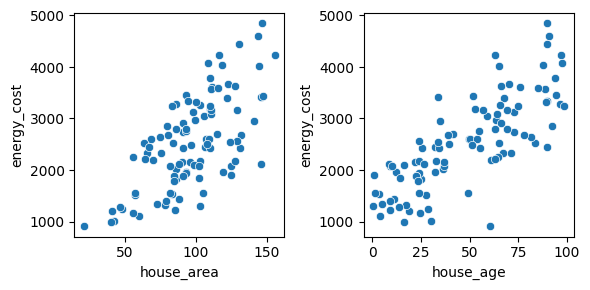

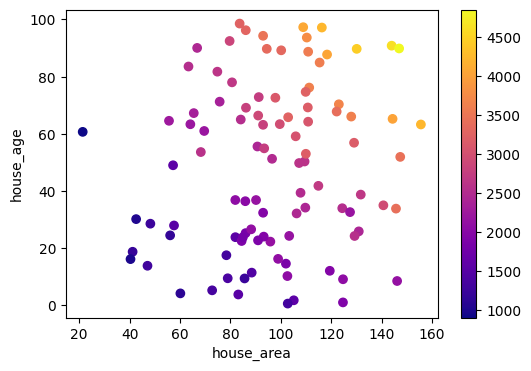

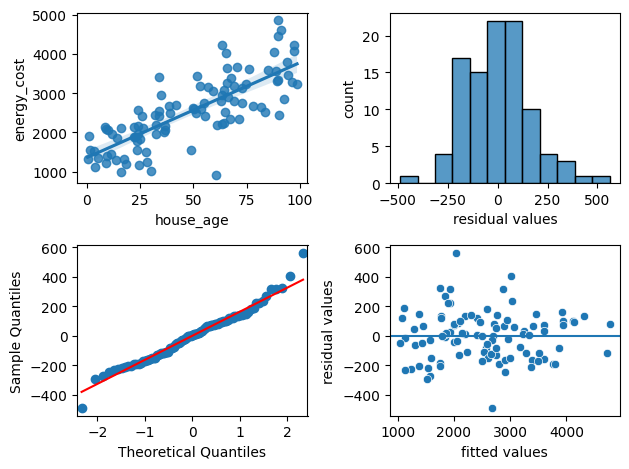

In [30]:
#parameters assumed for the synthetic data

#   distribution parameters for the explanatory variables
mean_house_area = 100           #assumed mean house area (m2)
std_house_area = 30             #assumed standard deviation of house area
max_house_age = 100             #assumed maximum house age (years)

#   relative effects of explanatory variables
area_effect = 10           #assumed effect of area on energy cost (euro/m2)
age_effect = 2             #assumed effect of age on energy cost (euro/year)

#   interaction term
interaction_term = 0.2          #assumed interaction between age and area

#   assumed standard deviation of random effects (noise)
std_random_effects = 150

#   assumed fix energy cost for any house
fixed_costs = 500

#set sample size
sample_size = 100

#set a random seed for reproducibility of results
np.random.seed(42)

#generate data for explanatory variables and random effects
house_area=np.random.normal(mean_house_area,std_house_area,size=sample_size) #a main driver
house_age=np.random.uniform(0, max_house_age,size=sample_size) #a main driver
random_effects = np.random.normal(0,std_random_effects,size=sample_size)

#generate synthetic energy cost data
energy_cost=fixed_costs + area_effect*house_area + age_effect* house_age + interaction_term*house_age*house_area + random_effects


#create a DataFrame to store the energy cost data
df = pd.DataFrame({
    'energy_cost': energy_cost,
    'house_area': house_area,
    'house_age': house_age
})

#display the dataframe
print('\nData')
print('-----------------')
display(df.head())

#visualize the data
fig1,axs1=plt.subplots(1,2, figsize=(6,3))
sns.scatterplot(ax = axs1[0],data=df, x='house_area', y='energy_cost')
sns.scatterplot(ax = axs1[1],data=df, x='house_age', y='energy_cost')
plt.tight_layout()

fig2,axs2=plt.subplots(figsize=(6,4))
scatter2d=axs2.scatter(df['house_area'],df['house_age'], c = df['energy_cost'], cmap =cmx.plasma)
fig2.colorbar(scatter2d)
axs2.set_xlabel('house_area')
axs2.set_ylabel('house_age')

#formulate statistical model
formula1='energy_cost ~ house_area + house_age'
formula2='energy_cost ~ house_area + house_age + house_area*house_age'

#perform multiple linear regression
OLS=ols(formula=formula2, data=df)
model=OLS.fit()
results=model.summary()
print(results)

#visualize the results
fig3,axs3=plt.subplots(2,2)
sns.regplot(ax=axs3[0,0], data=df, x='house_age', y='energy_cost')
sns.histplot(ax=axs3[0,1],data=model.resid)
axs3[0,1].set_xlabel('residual values')
axs3[0,1].set_ylabel('count')
sm.qqplot(ax=axs3[1,0], data=model.resid, line='s')
sns.scatterplot(ax=axs3[1,1], x=model.fittedvalues,y=model.resid)
axs3[1,1].axhline(0)
axs3[1,1].set_xlabel('fitted values')
axs3[1,1].set_ylabel('residual values')
plt.tight_layout()
plt.show()




#6. One-way Anova

**Data:** Energy_system: The type of energy system (e.g., heat pump, electric heating, gas, or solar) significantly affects energy costs based on efficiency and reliance on renewable energy sources.

*Assumptions*:
* heat pumps are assumed to be most efficient (lowest consumption)
* solar energy moderately reduces costs due to self-generation
* electric heating is least efficient (highest consumption)
* gas is assumed to have moderate efficiency
* there is a fixed cost and random noise

*Model*

`heatpump_effect` = -300
<br>`solar_effect `= -200
<br>`electric_heating_effect` = 0
<br>`gas_effect` = -100
<br>`fixed_costs` = 2000
<br>`std_random_effects` = 80


*Formula to generate data*:

`energy_cost = fixed_costs + energy_effect(energy_system) + random_effects`

**Resulta:**

*Anova results* : The p-value for energy_system is less than 0.05, indicating a statistically significant effect of energy systems on energy_cost.

*Tukey HSD test results* : The pairwise comparisons between the groups with different energy_systems show that the p-value is below 0.05 for each pair, indicating their means are significantly different. The differences in means correspond approximately to the true differences in the synthetic data. For example, the difference between electric_heating and gas is -122.8, similar to the true (assumed) difference of 100.


Data
-----------------


,energy_cost,energy_system
0,1806.963765,solar
1,1976.079412,electric_heating
2,1907.340862,gas
3,1740.994487,gas
4,1682.426249,heatpump


One-way ANOVA
-----------------

Results:
F-statistic: 68.00632831554859
P-value: 1.1498907205107357e-23

Posthoc-test using Tukey HSD
-----------------

Results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1       group2   meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------
electric_heating      gas    -97.81 0.0001 -152.9544  -42.6655   True
electric_heating heatpump -265.8246    0.0 -317.9748 -213.6745   True
electric_heating    solar -205.6348    0.0 -260.1894 -151.0802   True
             gas heatpump -168.0147    0.0 -220.7815 -115.2478   True
             gas    solar -107.8249    0.0 -162.9693  -52.6804   True
        heatpump    solar   60.1898 0.0169    8.0397  112.3399   True
---------------------------------------------------------------------


"\n#Alternative way to conduct the Anova analysis\n#where you first do a linear regression\n#and use it as a basis for the Anova\n\n#perform a linear regression as basis \nOLS=ols(formula=formula, data=df)\nmodel=OLS.fit()\nresults=model.summary()\n\n#perform the Anova test\nprint('\nAnova typ 2')\nresult_type2=sm.stats.anova_lm(model,typ=2)\nprint(result_type2)\n"

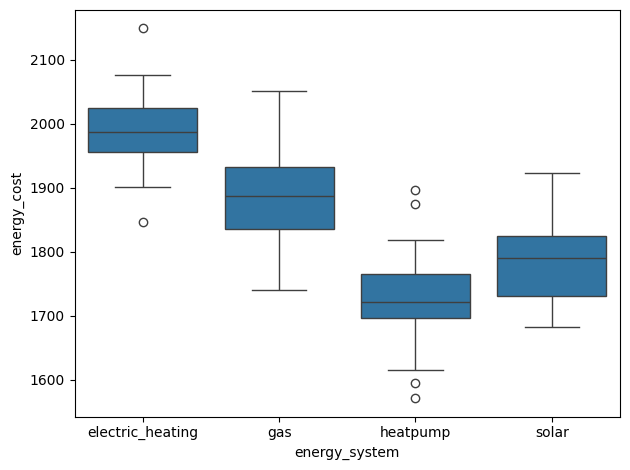

In [32]:
#One way anova with multiple factor levels

#imports
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#parameters assumed for the synthetic data

#   effects of explanatory variables
heatpump_effect = -300        # heat pumps are assumed to be most efficient (lowest consumption)
solar_effect = -200           # solar energy moderately reduces costs due to self-generation
electric_heating_effect = 0   # electric heating is least efficient (highest consumption) and used as baseline
gas_effect = -100              # gas is assumed to have moderate efficiency

#   assumed fixed cost for any house
fixed_costs = 2000

#   assumed standard deviation of random effects (noise)
std_random_effects = 80

#   set sample size
sample_size=100

#set a random seed for reproducibility of results
np.random.seed(42)

#generate data for explanatory variables and random effects

#   define the different types of energy system
energy_systems = ['heatpump', 'solar', 'gas', 'electric_heating']

#   generate a data column for types of energy system with equal probability (0.25) of occurrence
energy_system = np.random.choice(energy_systems, size=sample_size, p=[0.25, 0.25, 0.25, 0.25])

#   generate random effects
random_effects = np.random.normal(0,std_random_effects,size=sample_size) #unmeasured effects

#   assumed fixed costs for any house
fixed_cost = 2000

#   add effect coefficients for energy systems to dictionary
system_effects = {
    'heatpump': heatpump_effect,
    'solar': solar_effect,
    'electric_heating': electric_heating_effect,
    'gas': gas_effect,
                  }

#generate synthetic energy cost data by applying the system effect to energy costs
energy_cost = (
    fixed_cost+
    np.array([system_effects[system] for system in energy_system]) +
    random_effects # Random noise
)

#create a DataFrame to store the energy cost data
df = pd.DataFrame({
    'energy_cost': energy_cost,
    'energy_system': energy_system
})

#format heatpump as an integer and categorical variable (for the analysis)
df['energy_system']=df['energy_system'].astype('category')

#display the dataframe
print('\nData')
print('-----------------')
display(df.head())

#visualize the data
fig,axs=plt.subplots()
sns.boxplot(ax=axs, x='energy_system', y='energy_cost',data=df)
plt.tight_layout()

#group the data by energy_system and separate it into individual arrays
heatpump_   = df[df['energy_system'] == 'heatpump']['energy_cost']
solar_       = df[df['energy_system'] == 'solar']['energy_cost']
electric_    = df[df['energy_system'] == 'electric_heating']['energy_cost']
gas_         = df[df['energy_system'] == 'gas']['energy_cost']

#perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(heatpump_, solar_ , electric_, gas_)

#output the results

print('One-way ANOVA')
print('-----------------')
print('\nResults:')
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


tukey = pairwise_tukeyhsd(endog = df["energy_cost"], groups = df["energy_system"], alpha = 0.05)
results_tukey=tukey.summary()
print('\nPosthoc-test using Tukey HSD')
print('-----------------')
print('\nResults:')
print(results_tukey)

'''
#Alternative way to conduct the Anova analysis
#where you first do a linear regression
#and use it as a basis for the Anova

#perform a linear regression as basis
OLS=ols(formula=formula, data=df)
model=OLS.fit()
results=model.summary()

#perform the Anova test
print('\nAnova typ 2')
result_type2=sm.stats.anova_lm(model,typ=2)
print(result_type2)
'''


#7. Two-way Anova


**Data:**
* Energy_system: The type of energy system (e.g., heat pump, electric heating, gas, or solar) significantly affects energy costs based on efficiency and reliance on renewable energy sources.
* Window_type: Single-pane or double-pane windows influence energy efficiency.

*Assumptions*:
* heat pumps are assumed to be most efficient (lowest consumption)
* solar energy moderately reduces costs due to self-generation
* electric heating is least efficient (highest consumption)
* double-paned glass reduces energy costs
* gas is assumed to have moderate efficiency
* there is a fixed cost and random noise

*Model*

`heatpump_effect` = -300
<br>`solar_effect `= -200
<br>`electric_heating_effect` = 0
<br>`gas_effect` = -100
<br>`single_pane_effect` = 0
<br>`single_pane_effect` = -150
<br>`fixed_costs` = 2000
<br>`std_random_effects` = 150


*Formula to generate data*:

`energy_cost = fixed_costs + energy_effect(energy_system) + window_type_effect(window_type) + random_effects`

**Resulta:**

*Anova results* : The p-value for both `energy_system` and `window_type` is less than 0.05, indicating there is a statistically significant effect of both factors on energy_cost.

*Tukey HSD test results* : The pairwise comparisons between groups with different energy_systems and window_types show that for most pairs, the p-value is below 0.05, indicating their means are significantly different. The differences in means (meandiff) are in many cases similar to the true differences in the synthetic data. For example, for the pair `electric_heating-double pane` and `electric_heating-single pane`, the true (assumed) value is 150, and the model suggests 163. Similarly, the difference between single and double glazing for other energy systems is also close to the true 150 value.  


Data
-----------------


,energy_cost,energy_system,window_type
0,1729.761393,solar,single_pane
1,1783.849572,electric_heating,double_pane
2,1731.881689,gas,double_pane
3,1779.389241,gas,double_pane
4,1623.086770,heatpump,double_pane



Two-way ANOVA
-----------------

Results:
                        sum_sq     df           F         PR(>F)
C(energy_system)  1.230722e+07    3.0  667.662190  1.018672e-237
C(window_type)    5.605265e+06    1.0  912.250572  9.478019e-143
Residual          6.113714e+06  995.0         NaN            NaN

Posthoc-test using Tukey HSD
-----------------

Results:
                           Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
            group1                         group2              meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------------------------------------------
electric_heating - double_pane electric_heating - single_pane  163.7658    0.0  132.9811  194.5504   True
electric_heating - double_pane              gas - double_pane  -93.1917    0.0 -122.8458  -63.5376   True
electric_heating - double_pane              gas - single_pane    56.534    0.0   27.8422   85.2257   True
ele

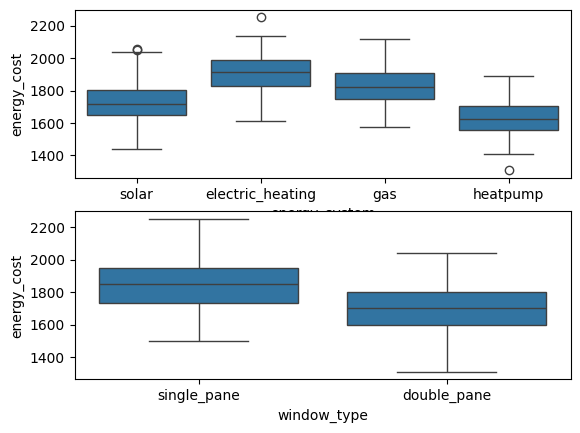

In [67]:
#Two way anova

#parameters assumed for the synthetic data

#   effects of explanatory variables
heatpump_effect = -300        # heat pumps are assumed to be most efficient (lowest consumption)
solar_effect = -200           # solar energy moderately reduces costs due to self-generation
electric_heating_effect = 0   # electric heating is least efficient (highest consumption)
gas_effect = -100              # gas is assumed to have moderate efficiency

single_pane_effect = 0        # single paned glass is the baseline
double_pane_effect = -150     # double paned glass reduces energy costs

#   assumed fixed costs for any house
fixed_cost = 2000

#   assumed standard deviation of random effects (noise)
std_random_effects = 80

#   set sample size
sample_size=1000

#set a random seed for reproducibility of results
np.random.seed(42)

#generate data for explanatory variables and random effects

#   define the different types of energy system and window types
energy_systems = ['heatpump', 'solar', 'gas', 'electric_heating']
window_types = ['single_pane', 'double_pane']

#   generate a data column for types of energy system with equal probability (0.25) of occurrence
energy_system_column = np.random.choice(energy_systems, size=sample_size, p=[0.25, 0.25, 0.25, 0.25])
window_type_column = np.random.choice(window_types, size=sample_size, p=[0.5,0.5])


#   generate random effects
random_effects = np.random.normal(0,std_random_effects,size=sample_size) #unmeasured effects



#   add effect coefficients for energy systems to dictionary
system_effects = {
    'heatpump': heatpump_effect,
    'solar': solar_effect,
    'electric_heating': electric_heating_effect,
    'gas': gas_effect,
                  }
#   add effect coefficients coefficients for window types
window_effects = {
    'single_pane': single_pane_effect,
    'double_pane': double_pane_effect
                  }
#generate synthetic energy cost data by applying the effect of energy system and window type to energy costs
energy_cost = (
    fixed_cost+
    np.array([system_effects[system] for system in energy_system_column]) +
    np.array([window_effects[wtype] for wtype in window_type_column]) +
    random_effects # Random noise
)

#create a DataFrame to store the energy cost data
df = pd.DataFrame({
    'energy_cost': energy_cost,
    'energy_system': energy_system_column,
    'window_type': window_type_column
})

#formatting of energy_system and window type as categorical variable
#is in this case not necessary since they are strings, and is left out to allow
#manipulation of the data for the Tukey test in the end

#display the dataframe
print('\nData')
print('-----------------')
display(df.head())

#visualize the data
fig,axs=plt.subplots(2,1)
sns.boxplot(ax=axs[0], x='energy_system', y='energy_cost',data=df)
sns.boxplot(ax=axs[1], x='window_type', y='energy_cost',data=df)
plt.tight_layout()

#formulate the model
formula='energy_cost ~ C(energy_system) + C(window_type)'

#perform a linear regression as basis for the Anova test
OLS=ols(formula=formula, data=df)
model=OLS.fit()

#please uncomment to see the results of the linear regression
#results=model.summary()
#print(results)



#perform the Anova test
result_two_way=sm.stats.anova_lm(model,typ=2)

print('\nTwo-way ANOVA')
print('-----------------')
print('\nResults:')
print(result_two_way)


#if P<0.05 we can do a posthoc test


# Perform Tukey HSD test for pairwise comparisons
# We combine the 'energy_system,' and 'window_type' columns for a pairwise comparison
df['energy_system___window_type'] = df['energy_system'] + ' - ' + df['window_type']

# Tukey HSD Test
results_tukey = pairwise_tukeyhsd(endog=df['energy_cost'], groups=df['energy_system___window_type'], alpha=0.05)

print('\nPosthoc-test using Tukey HSD')
print('-----------------')
print('\nResults:')
print(results_tukey)